In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Use case-2-False Alarm Detectio - Himanshu Raul.xlsx')

In [3]:
df.head()

,Ambient temperature ('F),Calibration (days),Unwanted substance deposition (0/1),Relative humidity (%),Dangerous (0/1)
0,15,190,1,95,0
1,10,143,1,89,0
2,21,97,0,80,1
3,11,180,0,97,0
4,27,198,0,79,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Ambient temperature ('F)             50 non-null     int64
 1   Calibration (days)                   50 non-null     int64
 2   Unwanted substance deposition (0/1)  50 non-null     int64
 3   Relative humidity (%)                50 non-null     int64
 4   Dangerous (0/1)                      50 non-null     int64
dtypes: int64(5)
memory usage: 2.1 KB


In [5]:
df.corr()

,Ambient temperature ('F),Calibration (days),Unwanted substance deposition (0/1),Relative humidity (%),Dangerous (0/1)
Ambient temperature ('F),1.000000,-0.338009,-0.255002,-0.761876,0.864212
Calibration (days),-0.338009,1.000000,0.001583,0.369702,-0.487367
Unwanted substance deposition (0/1),-0.255002,0.001583,1.000000,0.259399,-0.309199
Relative humidity (%),-0.761876,0.369702,0.259399,1.000000,-0.829380
Dangerous (0/1),0.864212,-0.487367,-0.309199,-0.829380,1.000000


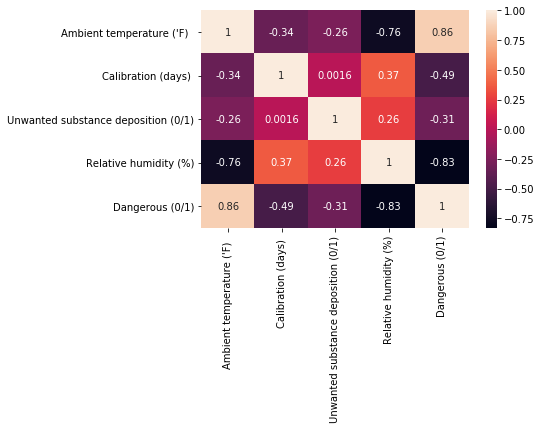

In [6]:
sns.heatmap(df.corr(), annot=True)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x = df.drop('Dangerous (0/1)', axis=1)
x.head()

,Ambient temperature ('F),Calibration (days),Unwanted substance deposition (0/1),Relative humidity (%)
0,15,190,1,95
1,10,143,1,89
2,21,97,0,80
3,11,180,0,97
4,27,198,0,79


In [10]:
y = df['Dangerous (0/1)']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Dangerous (0/1), dtype: int64

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt = DecisionTreeClassifier()

In [50]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
y.pred = dt.predict(x_test)

In [52]:
confusion_matrix(y_test, y.pred)

array([[8, 0],
       [1, 6]], dtype=int64)

In [53]:
accuracy_score(y_test, y.pred)

0.9333333333333333

In [54]:
cross_val_score(dt,x,y,cv=10,scoring='accuracy').mean()

0.9200000000000002